<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#нормальное-распределение" data-toc-modified-id="нормальное-распределение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>нормальное распределение</a></span><ul class="toc-item"><li><span><a href="#точный-доверительный-интервал" data-toc-modified-id="точный-доверительный-интервал-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>точный доверительный интервал</a></span><ul class="toc-item"><li><span><a href="#mu---мат.-ожидание" data-toc-modified-id="mu---мат.-ожидание-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>mu - мат. ожидание</a></span></li><li><span><a href="#sigma2---дисперсия" data-toc-modified-id="sigma2---дисперсия-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>sigma2 - дисперсия</a></span></li></ul></li><li><span><a href="#непараметрический-бутстрэп" data-toc-modified-id="непараметрический-бутстрэп-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>непараметрический бутстрэп</a></span></li></ul></li><li><span><a href="#экспоненциальное-распределение" data-toc-modified-id="экспоненциальное-распределение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>экспоненциальное распределение</a></span><ul class="toc-item"><li><span><a href="#непараметрический-бутстреп" data-toc-modified-id="непараметрический-бутстреп-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>непараметрический бутстреп</a></span><ul class="toc-item"><li><span><a href="#для-beta" data-toc-modified-id="для-beta-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>для beta</a></span></li><li><span><a href="#для-lambda" data-toc-modified-id="для-lambda-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>для lambda</a></span></li></ul></li></ul></li><li><span><a href="#Гипотеза-о-среднем-росте" data-toc-modified-id="Гипотеза-о-среднем-росте-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Гипотеза о среднем росте</a></span></li></ul></div>

In [1]:
from scipy import stats
import numpy as np

import seaborn as sns
import pandas as pd

# нормальное распределение 

In [2]:
# как бы неизвестные параметры (придумали сами)
mu = 160
sigma = 15

# уровень значимости и размер выборки
alpha = 0.05
n = 100

# сгенерировали выборку
x = np.random.normal(loc=mu, scale=sigma, size=n)
x_height = x.copy()
x

array([139.51173496, 148.53311484, 157.48185697, 172.28600816,
       179.70386131, 172.37478948, 163.43709365, 145.82208226,
       174.8358769 , 139.21525988, 133.44886924, 190.33958668,
       158.58891212, 149.77390878, 172.86616409, 171.21754945,
       140.50441688, 158.20469428, 159.64874441, 157.60460452,
       162.41928078, 157.73892954, 150.9621215 , 151.244821  ,
       173.41619216, 149.82274033, 150.99742022, 171.76804239,
       164.80518421, 147.84268127, 180.22833876, 126.93729099,
       162.88876225, 153.80278126, 155.91207915, 178.20522725,
       159.41330351, 164.73827022, 154.17148452, 178.42083998,
       145.75965663, 170.33024599, 164.87403932, 148.98602823,
       150.94094416, 152.48868322, 172.38493565, 174.24400582,
       150.76190969, 150.3073423 , 154.918342  , 160.75331535,
       177.35100935, 159.14958141, 153.23027101, 153.90892761,
       183.43438785, 179.48943512, 133.89147724, 172.62824396,
       141.33345018, 173.16376561, 189.61457145, 153.83

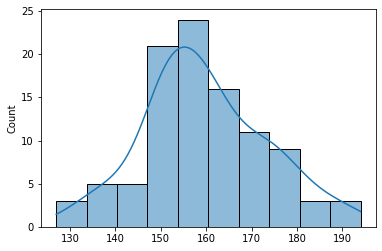

In [3]:
# предположим, что это нормальное распределение
# построим разные дов. интервалы для неизвестных параметров mu и sigma
sns.histplot(x, bins=10, kde=True);

## точный доверительный интервал

In [4]:
# точечные оценки методом моментов / макс. правдоподобия
# просто выборочные среднее и дисперсия
x.mean(), x.var()

(159.64825269129605, 183.38054147534368)

### mu - мат. ожидание

![](https://dataz4s.com/wp-content/uploads/2020/03/03.-Confidence-intervals-formula.jpg)

![](https://media.geeksforgeeks.org/wp-content/uploads/20200525113955/f126.png)

In [5]:
# квантиль уровня 1-alpha
t = stats.t(100).ppf(1-0.05/2)

# ТОЧНЫЙ дов. интервал для mu
CI_mu_lower, CI_mu_upper = x.mean() - t*x.std()/n**0.5, x.mean() + t*x.std()/n**0.5
CI_mu_lower, CI_mu_upper

# грубо говоря, mu лежит в нем с вероятностью 95%

(156.96159671759827, 162.33490866499383)

In [6]:
mu
# настоящее mu действительно в дов. интервале

160

### sigma2 - дисперсия

![](https://knowledgehills.com/content/images/Six-Sigma/Six-Sigma-t-Confidence-Interval-Variance-Chart.gif)

In [7]:
chi2_lower = stats.chi2(n-1).ppf(0.05/2)
chi2_upper = stats.chi2(n-1).ppf(1-0.05/2)

# квантили хи-квадрата
chi2_lower, chi2_upper

(73.36108019128368, 128.4219886438403)

In [8]:
# дов. интервал для sigma
x.var(ddof=1)*(n-1)/chi2_upper, x.var(ddof=1)*(n-1)/chi2_lower

(142.7952824994191, 249.9697946066119)

In [9]:
# настоящая sigma^2
sigma**2

225

## непараметрический бутстрэп

![](https://hsto.org/webt/n0/dg/du/n0dgduav1ygc3iylumtwjcn15mu.png)

In [10]:
m = 100000

# сгенерируем m псевдовыборок
X_bootstrapped = np.random.choice(x, size=(n, m), replace=True)
X_bootstrapped.shape

(100, 100000)

In [11]:
mu_bootstrapped = X_bootstrapped.mean(axis=0)
mu_bootstrapped.shape

(100000,)

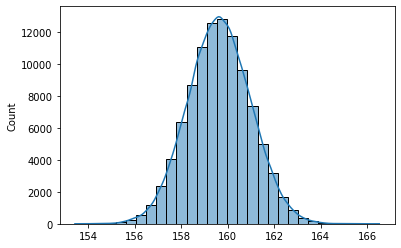

In [12]:
sns.histplot(mu_bootstrapped, bins=30, kde=True);

In [13]:
var_bootstrapped = X_bootstrapped.var(axis=0, ddof=1)
var_bootstrapped.shape

(100000,)

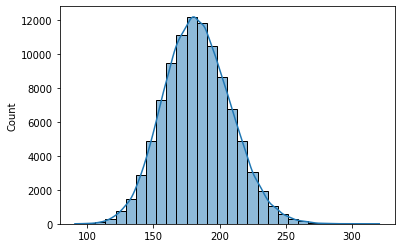

In [14]:
sns.histplot(var_bootstrapped, bins=30, kde=True);

In [15]:
np.quantile(mu_bootstrapped, alpha/2), np.quantile(mu_bootstrapped, 1-alpha/2)


(157.0194068081845, 162.30210798076686)

In [16]:
# ТОЧНЫЙ дов. интервал для mu
CI_mu_lower, CI_mu_upper
# интервалы почти совпали!

(156.96159671759827, 162.33490866499383)

# экспоненциальное распределение

## непараметрический бутстреп 

### для beta

![](https://numpy.org/doc/1.16/_images/math/8840abeb74cea46293b944971a4cac7f0db924f6.svg)

In [17]:
scale = 10
x = np.random.exponential(scale=scale, size=n)

In [18]:
X_bootstrapped = np.random.choice(x, size=(n, m), replace=True)
mu_bootstrapped = X_bootstrapped.mean(axis=0)
np.quantile(mu_bootstrapped, alpha/2), np.quantile(mu_bootstrapped, 1-alpha/2)

(8.480173792917585, 12.750814632093768)

In [19]:
scale

10

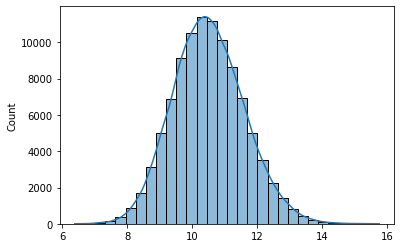

In [20]:
sns.histplot(mu_bootstrapped, bins=30, kde=True);

### для lambda

![](https://www.gstatic.com/education/formulas2/397133473/en/exponential_distribution.svg)

In [21]:
# методом моментов - lambda = 1/x.mean()
lambda_bootstrapped = 1/X_bootstrapped.mean(axis=0)

In [22]:
np.quantile(lambda_bootstrapped, alpha/2), np.quantile(lambda_bootstrapped, 1-alpha/2)

(0.07842636167668537, 0.11792211156757608)

In [23]:
1/scale

0.1

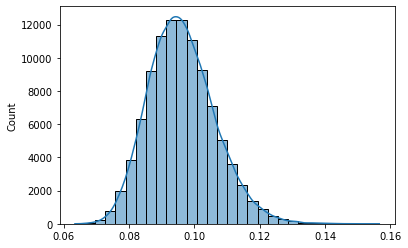

In [24]:
sns.histplot(lambda_bootstrapped, bins=30, kde=True);

# Гипотеза о среднем росте

In [25]:
# сгенерировали выборку
x = x_height
x

array([139.51173496, 148.53311484, 157.48185697, 172.28600816,
       179.70386131, 172.37478948, 163.43709365, 145.82208226,
       174.8358769 , 139.21525988, 133.44886924, 190.33958668,
       158.58891212, 149.77390878, 172.86616409, 171.21754945,
       140.50441688, 158.20469428, 159.64874441, 157.60460452,
       162.41928078, 157.73892954, 150.9621215 , 151.244821  ,
       173.41619216, 149.82274033, 150.99742022, 171.76804239,
       164.80518421, 147.84268127, 180.22833876, 126.93729099,
       162.88876225, 153.80278126, 155.91207915, 178.20522725,
       159.41330351, 164.73827022, 154.17148452, 178.42083998,
       145.75965663, 170.33024599, 164.87403932, 148.98602823,
       150.94094416, 152.48868322, 172.38493565, 174.24400582,
       150.76190969, 150.3073423 , 154.918342  , 160.75331535,
       177.35100935, 159.14958141, 153.23027101, 153.90892761,
       183.43438785, 179.48943512, 133.89147724, 172.62824396,
       141.33345018, 173.16376561, 189.61457145, 153.83

- H_0 : mu = 162
- H_1 : mu ≠ 162

In [26]:
mu_0 = 162

z_obs = (x.mean() - mu_0)/(sigma/n**0.5)
z_obs

-1.567831539135966

In [27]:
z_crit = stats.norm.ppf(1-alpha/2)
z_crit

1.959963984540054

In [28]:
# через сравнение стратистик
'H_0 approved'if np.abs(z_obs) <= z_crit else 'H_0 rejected'

'H_0 approved'

In [29]:
# через сравнение с интервалом
'H_0 approved'if CI_mu_lower <= mu_0 <= CI_mu_upper else 'H_0 rejected'

'H_0 approved'

In [30]:
np.abs(z_obs)

1.567831539135966

In [31]:
p_value = stats.norm.cdf(np.abs(z_obs))-stats.norm.cdf(-np.abs(z_obs))
p_value

0.8830795476953996

In [32]:
p_value = 2*stats.norm.cdf(np.abs(z_obs))-1
p_value

0.8830795476953996